# Task
Perform a classification analysis on the dataset "/content/diabetes.csv" using the Support Vector Machine algorithm.

## Load the dataset

### Subtask:
Load the `diabetes.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify that the data was loaded correctly.



In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data preprocessing

### Subtask:
Handle missing values, scale features, and split the data into training and testing sets.


**Reasoning**:
Check for missing values in the DataFrame.



In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Reasoning**:
Since there are no missing values, separate features and target, scale the features, and split the data.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train the svm model

### Subtask:
Train a Support Vector Machine classifier on the training data.


**Reasoning**:
Train a Support Vector Machine classifier on the training data.



In [5]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Use the trained SVM model to make predictions on the test set and calculate the evaluation metrics.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7273
Precision: 0.6327
Recall: 0.5636
F1-score: 0.5962


## Visualize results

### Subtask:
Create visualizations to understand the model's performance and the data.


**Reasoning**:
Generate and display the confusion matrix using a heatmap.



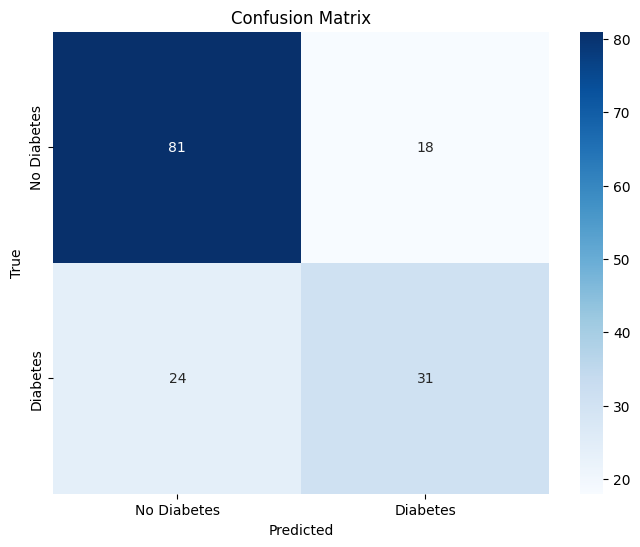

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Reasoning**:
Create scatter plots of two features from the scaled test data, colored by true and predicted target values, to visualize class separation and model predictions.



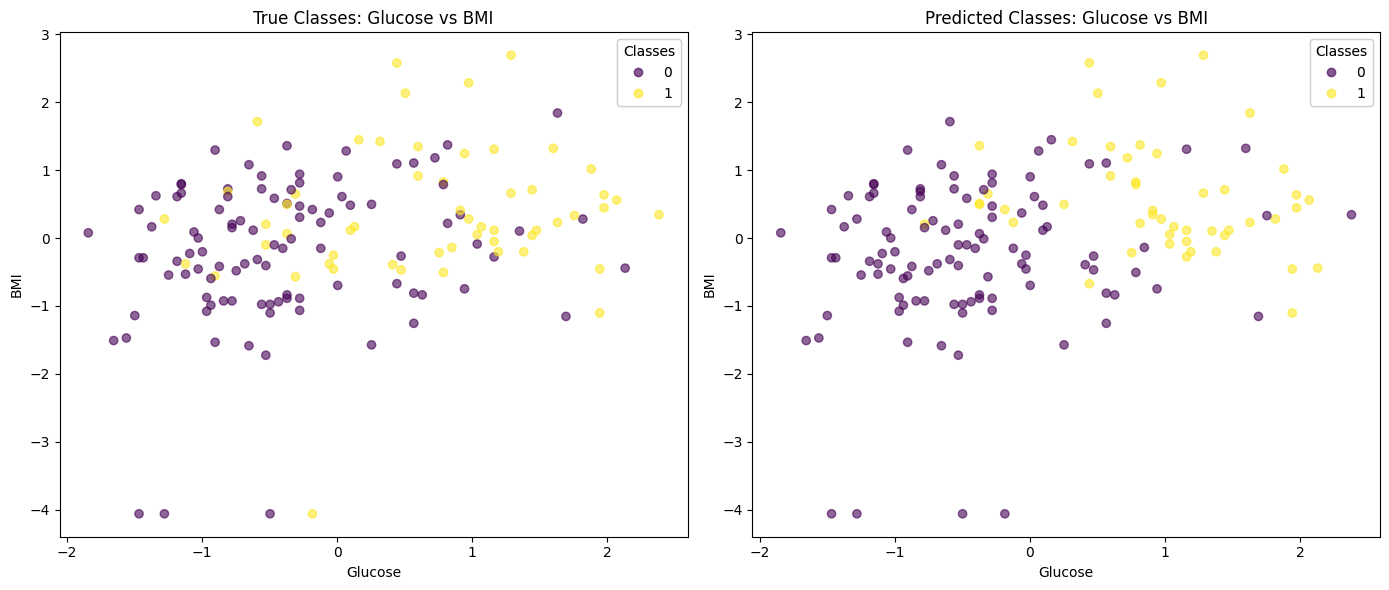

In [8]:
import matplotlib.pyplot as plt

# Convert scaled test data back to a DataFrame for easier feature selection
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Choose two features for visualization (e.g., Glucose and BMI)
feature1 = 'Glucose'
feature2 = 'BMI'

plt.figure(figsize=(14, 6))

# Scatter plot colored by true target values
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_test_df[feature1], X_test_df[feature2], c=y_test, cmap='viridis', alpha=0.6)
plt.title(f'True Classes: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
legend1 = plt.legend(*scatter1.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)


# Scatter plot colored by predicted target values
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_test_df[feature1], X_test_df[feature2], c=y_pred, cmap='viridis', alpha=0.6)
plt.title(f'Predicted Classes: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
legend2 = plt.legend(*scatter2.legend_elements(), title="Classes")
plt.gca().add_artist(legend2)


plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   The SVM model achieved an accuracy of 0.7273 on the test set.
*   The model's precision was 0.6327, recall was 0.5636, and the F1-score was 0.5962.
*   The confusion matrix shows the distribution of true and predicted class labels, indicating the number of correct and incorrect classifications.
*   Visualizations of the 'Glucose' and 'BMI' features show how the model classified data points based on these two features compared to their true class labels.

### Insights or Next Steps

*   The evaluation metrics suggest that the model has moderate performance in predicting diabetes. Further hyperparameter tuning or exploring other models could potentially improve the results.
*   The scatter plots provide a visual understanding of the data's separability based on 'Glucose' and 'BMI'. Analyzing other feature combinations could offer more insights into the data's structure and potentially identify features that are more discriminative for classification.
